### Importing important libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

### Importing data

In [2]:
data = pd.read_csv("Churn_data.csv")
col = pd.read_csv("Column Names.csv")

### Columns renaming

In [3]:
new_col = col.iloc[0,0]

In [4]:
data.rename(columns={data.columns[0]:new_col}, inplace=True)

In [5]:
data

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.145831,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.529829,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.327245,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.824671,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21


In [6]:
target_column = data.iloc[:, 17]
data.drop(columns=data.columns[17], inplace=True)
data['target'] = target_column

In [7]:
data

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1,target
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22,1
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38,1
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11,1
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18,0
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76,1
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74,0
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07,0
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21,0


In [8]:
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1,target
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22,1
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38,1
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11,1
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18,0
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10,0


In [9]:
print("Last 5 rows of the dataset:")
data.tail()

Last 5 rows of the dataset:


,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1,target
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,-0.16,4,...,0.200151,7,0,18,3.57,3.83,14.896154,0.328027,0.76,1
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,0.19,4,...,0.169835,7,0,18,6.89,7.70,55.156230,0.288006,12.74,0
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07,0
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21,0
24999,-1.00,275.3530,5.134579,5.954062,1,1,53.50,250.340,-0.48,4,...,0.609046,7,0,18,5.42,8.02,38.590040,1.000000,0.00,1


In [10]:
print(f'Dataset have {data.shape[0]} rows and {data.shape[1]} columns')

Dataset have 25000 rows and 111 columns


In [11]:
print("Information about the dataset:")
data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to target
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


In [12]:
data.columns

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6',
       's4.loc.ic.ins.p1',
       ...
       'prop.i2i.og.mou.p6', 's4.loc.ic.ins.p2', 's4.std.ic.ins.l14',
       's4.low.blnc.ins.p4', 's3.og.rev.all.m2', 's3.new.rev.m2',
       'prop.og.mou.any.p6', 'prop.loc.i2i.mou.og.mou.p3', 's3.rev.p1',
       'target'],
      dtype='object', length=111)

In [13]:
data.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
                               ...   
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
target                          int64
Length: 111, dtype: object

In [14]:
data['target'].value_counts()

target
0    17083
1     7917
Name: count, dtype: int64

In [15]:
print("Summary statistics for numeric columns")
data.describe().T

Summary statistics for numeric columns


,count,mean,std,min,25%,50%,75%,max
s6.new.rev.p2.m2,25000.0,-0.003730,2.727916,-1.000000,-0.580000,-0.170000,0.280000,316.860000
s1.new.rev.m1,25000.0,281.073083,276.075983,0.000000,101.563800,204.859600,370.711650,5702.924300
s3.og.rev.4db.p5,25000.0,4.890003,4.212452,0.000000,2.367288,3.729944,5.993342,153.221695
s3.new.rev.4db.p5,25000.0,7.070194,6.318992,0.000833,3.318825,5.231268,8.395736,170.200441
s4.usg.ins.p2,25000.0,5.460080,2.184444,0.000000,5.000000,7.000000,7.000000,7.000000
...,...,...,...,...,...,...,...,...
s3.new.rev.m2,25000.0,12.540182,11.540611,0.000000,6.167500,9.350000,14.620000,386.480000
prop.og.mou.any.p6,25000.0,53.594165,21.408486,0.000000,39.378142,53.976203,68.312416,100.000000
prop.loc.i2i.mou.og.mou.p3,25000.0,0.483975,0.292349,0.000000,0.251304,0.477621,0.716538,1.000000
s3.rev.p1,25000.0,9.951366,17.648128,0.000000,1.970000,5.380000,11.400000,585.500000


### Checking null values

In [16]:
for i in range(len(data.columns)):
    if data.iloc[:,i].isna().sum()!=0:
        print(i)
    else:
        print('None')

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


### Duplicate values

In [17]:
duplicates = data[data.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


### Removing Unique value variables

In [18]:
value_counts = data.nunique()
print(value_counts)

s6.new.rev.p2.m2                584
s1.new.rev.m1                 24134
s3.og.rev.4db.p5              24969
s3.new.rev.4db.p5             24980
s4.usg.ins.p2                     8
                              ...  
s3.new.rev.m2                  3860
prop.og.mou.any.p6            24819
prop.loc.i2i.mou.og.mou.p3    23102
s3.rev.p1                      3904
target                            2
Length: 111, dtype: int64


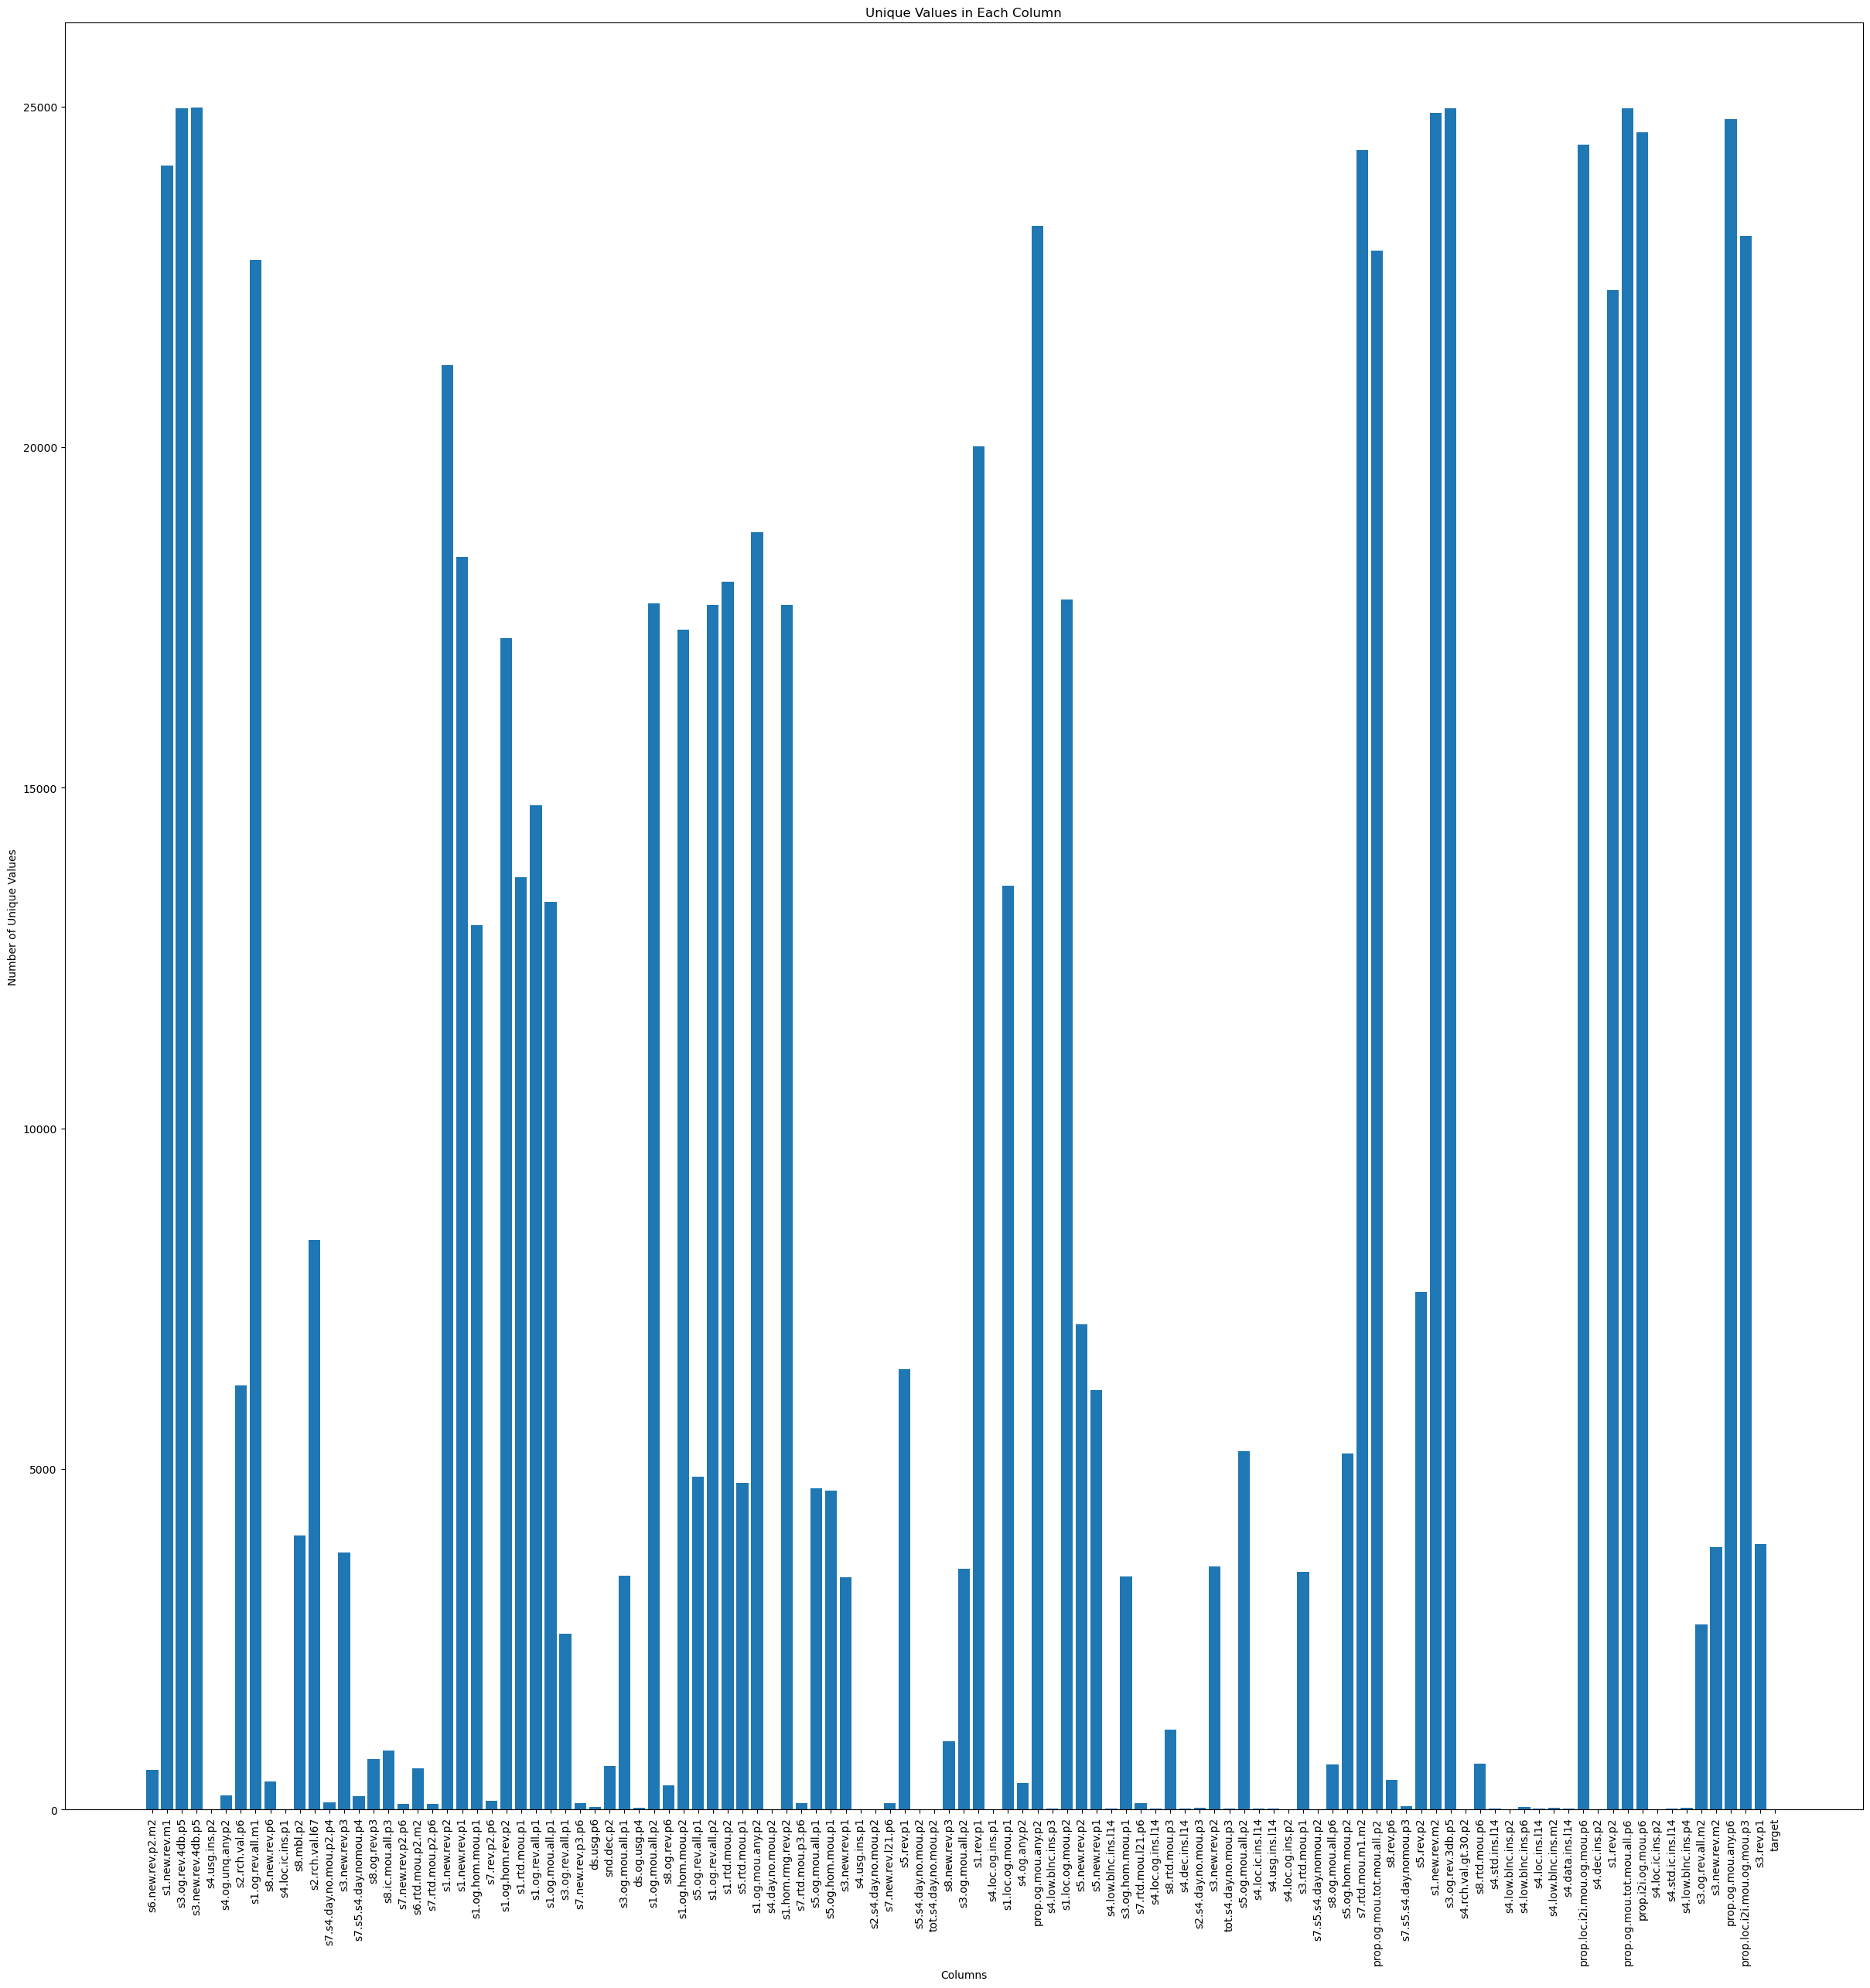

In [19]:
plt.figure(figsize=(30,30))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values in Each Column')
plt.xticks(rotation=90)
plt.show()

In [20]:
unique_columns = value_counts[value_counts == 1].index
print(unique_columns)

Index([], dtype='object')


In [21]:
data_filtered = data.drop(columns=unique_columns)
print(data_filtered)

       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.76        88.0482          3.106604           3.754955   
1                 -0.98        67.5039          3.094574           5.550865   
2                 -0.98        33.9248          2.324016           2.438114   
3                 -0.92        82.6780          2.630749           2.858961   
4                 -0.97        96.8379          2.674316           2.912397   
...                 ...            ...               ...                ...   
24995              0.21       132.0365          2.652236           2.857739   
24996              0.80        77.0154          3.763389           5.012503   
24997              0.01       148.8337          3.823940           4.334250   
24998              0.17      1012.4398         14.667580          14.579567   
24999             -1.00       275.3530          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.

### Removing Zero variance variables

In [22]:
#var_data = data_filtered.var()
#zero_var = var_data[var_data.apply(lambda x: str(x).startswith('0'))].index
#data_filtered.drop(columns=zero_var,inplace=True)


target_column = 'target'
var_data = data_filtered.drop(columns=[target_column]).var()
zero_var = var_data[var_data.apply(lambda x: str(x).startswith('0'))].index
data_filtered.drop(columns=zero_var, inplace=True)

if target_column not in data_filtered.columns:
    print("Warning: Target column '{}' was removed due to zero variance.".format(target_column))


In [23]:
data_filtered

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,1,-0.72,...,4,6.3180,4,0,9,6.02,8.20,46.465636,0.22,1
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,3,-0.08,...,1,0.7562,6,0,20,3.66,8.10,34.525456,0.38,1
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,3,-0.09,...,2,0.5174,6,1,19,4.33,4.36,10.298451,0.11,1
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,4,1.83,...,2,-8.7264,7,2,11,3.40,3.53,6.670783,5.18,0
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,4,-0.04,...,3,1.6745,6,1,14,3.85,3.87,21.998905,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5,8,26.67,123.396,4,0.76,...,5,20.6999,7,0,18,3.57,3.83,14.896154,0.76,1
24996,0.80,77.0154,3.763389,5.012503,2,8,27.88,62.140,4,0.37,...,2,42.8656,7,0,18,6.89,7.70,55.156230,12.74,0
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,2,-0.79,...,5,20.8590,3,0,12,6.63,7.48,33.222018,8.07,0
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,4,-1.09,...,4,489.7368,7,1,1,19.36,22.26,82.549378,21.21,0


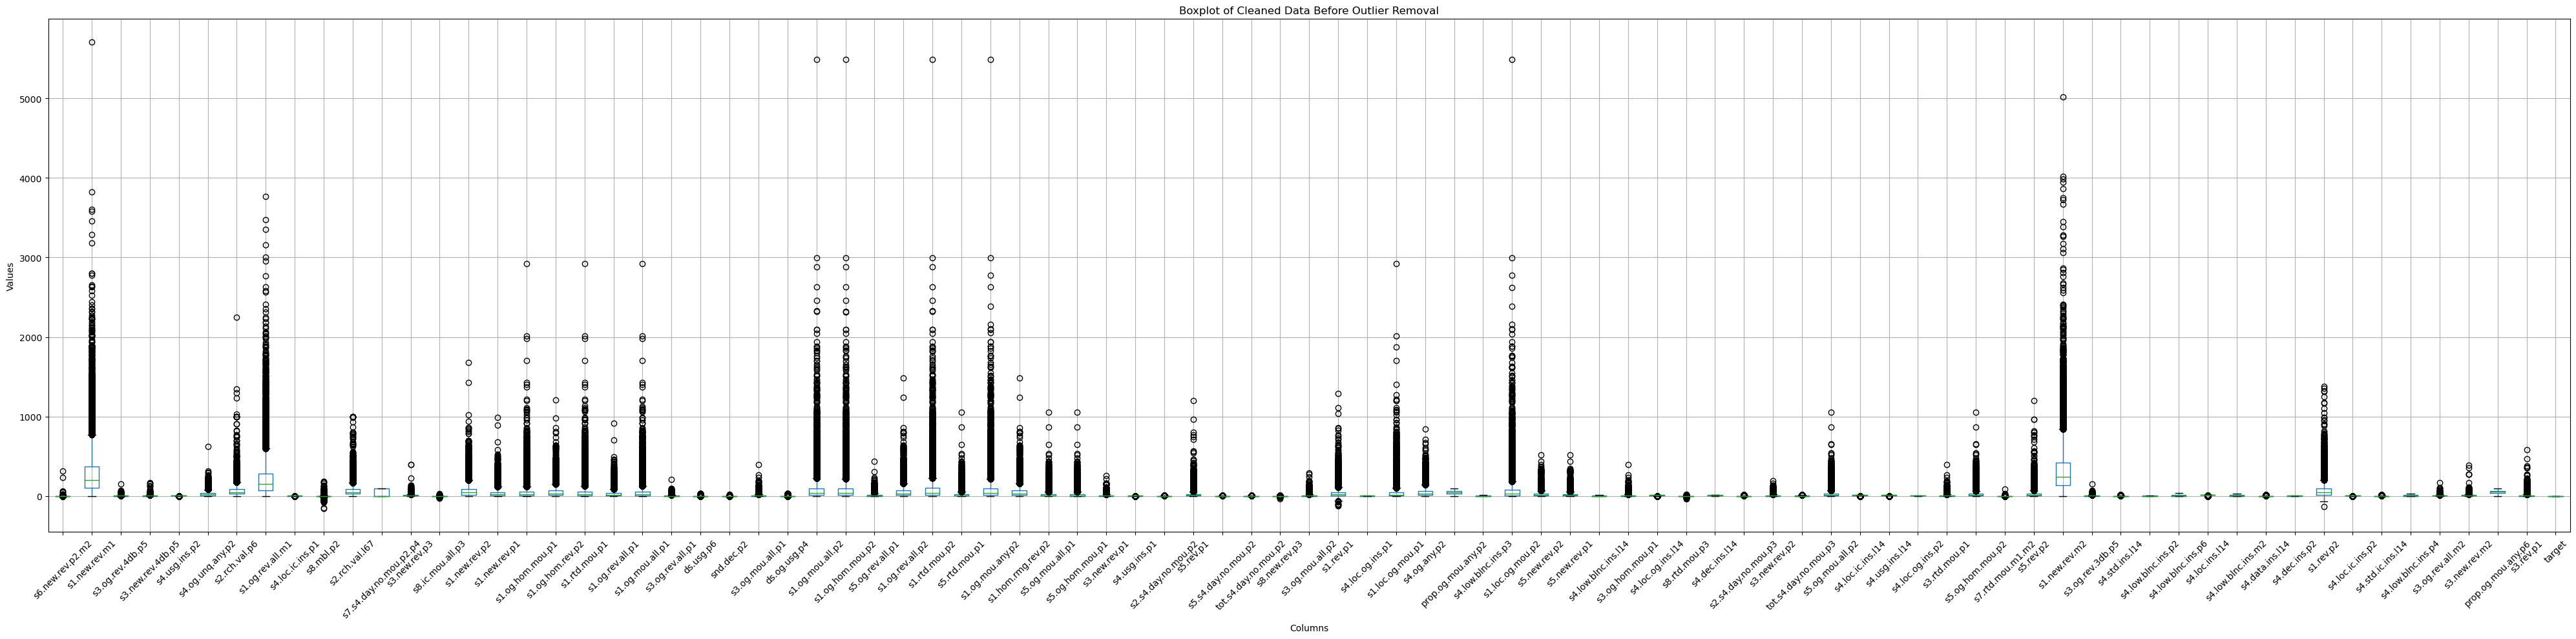

In [24]:
def boxplot_before(df):
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data Before Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(data_filtered)

### Outlier treatment

#### 1) Using Boxplot

In [25]:
columns_for_outlier_treatment = data_filtered.columns
print(columns_for_outlier_treatment)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's4.loc.ic.ins.p1', 's8.mbl.p2',
       's2.rch.val.l67', 's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3',
       's8.ic.mou.all.p3', 's1.new.rev.p2', 's1.new.rev.p1',
       's1.og.hom.mou.p1', 's1.og.hom.rev.p2', 's1.rtd.mou.p1',
       's1.og.rev.all.p1', 's1.og.mou.all.p1', 's3.og.rev.all.p1', 'ds.usg.p6',
       'snd.dec.p2', 's3.og.mou.all.p1', 'ds.og.usg.p4', 's1.og.mou.all.p2',
       's1.og.hom.mou.p2', 's5.og.rev.all.p1', 's1.og.rev.all.p2',
       's1.rtd.mou.p2', 's5.rtd.mou.p1', 's1.og.mou.any.p2',
       's1.hom.rmg.rev.p2', 's5.og.mou.all.p1', 's5.og.hom.mou.p1',
       's3.new.rev.p1', 's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's5.rev.p1',
       's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's8.new.rev.p3',
       's3.og.mou.all.p2', 's1.rev.p1', 's4.loc.og.ins.p1', 's1.loc.og.mou.p1',
       's4.og.any.p2

In [26]:
print(len(columns_for_outlier_treatment))

87


In [27]:
def remove_outliers_boxplot(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        #print(Q1,Q3)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #print(lower_bound,upper_bound)
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned
cleaned_data_boxplot = remove_outliers_boxplot(data_filtered,columns_for_outlier_treatment)

In [28]:
data_filtered.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,3.254720,-0.073908,...,4.394760,71.815476,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,9.951366,0.316680
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,1.193271,8.829159,...,2.686308,88.621086,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,17.648128,0.465191
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,0.000000,-153.750000,...,0.000000,-128.446200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,4.000000,183.350000,...,7.000000,1382.751700,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,585.500000,1.000000


In [29]:
cleaned_data_boxplot.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.083814,263.414113,4.559075,6.492778,5.624880,27.137520,67.150729,201.146059,3.374020,-0.547296,...,4.394760,64.075974,5.835480,1.322600,8.382160,7.578758,11.333164,53.594165,7.817712,0.316680
std,0.668743,211.173061,2.897105,4.219776,1.818213,23.163585,46.538585,167.480617,0.915725,3.921211,...,2.686308,60.515962,1.667562,1.822707,8.961016,4.477694,6.941543,21.408486,7.555598,0.465191
min,-1.000000,0.000000,0.000000,0.000833,2.000000,0.000000,0.000000,0.000000,1.500000,-7.960000,...,0.000000,-94.740475,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,1.570000,774.433425,11.432423,16.011101,7.000000,84.000000,175.131250,599.032500,4.000000,6.440000,...,7.000000,206.321925,7.000000,5.000000,30.000000,18.263750,27.298750,100.000000,25.545000,1.000000


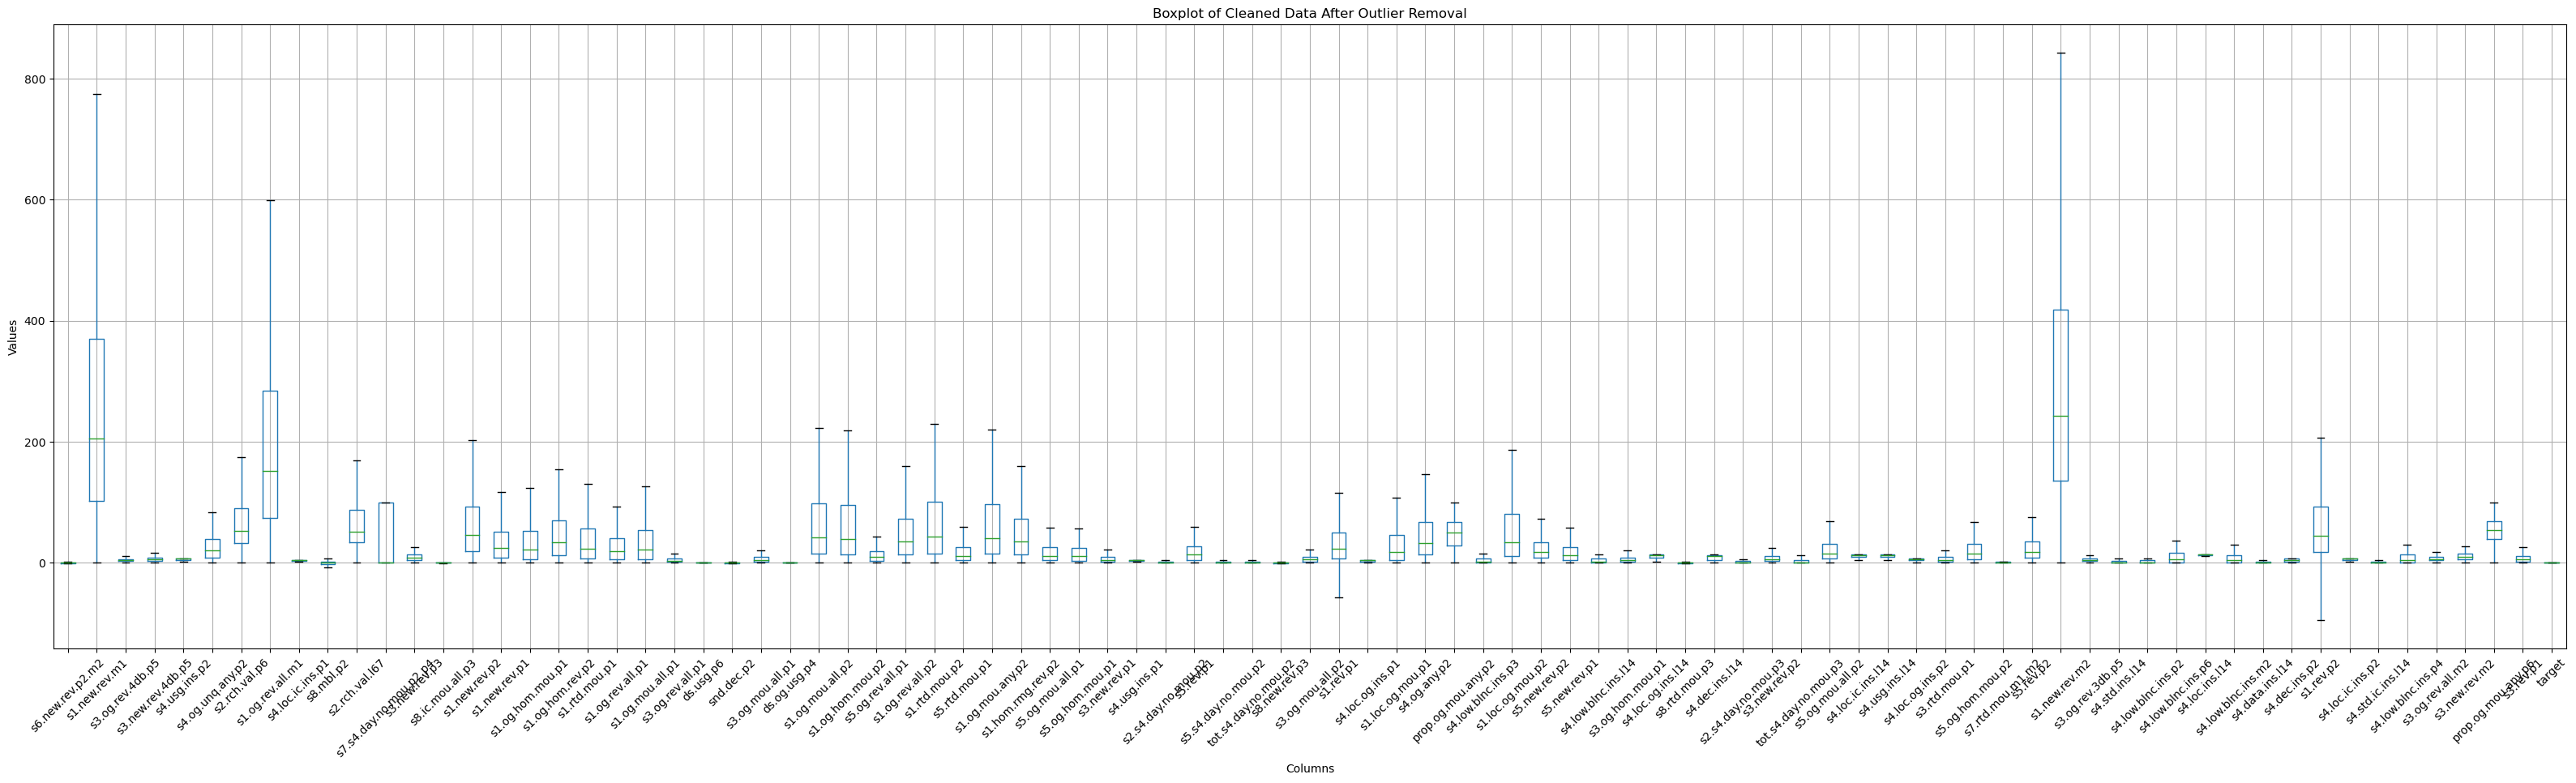

In [30]:
def boxplot_vis(df):
    
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data After Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()


boxplot_vis(cleaned_data_boxplot)

#### 2) Using Standardization

In [31]:
def remove_outliers_standardization(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        upper_bound = mean + 3 * std_dev
        lower_bound = mean - 3 * std_dev
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned

cleaned_df_standardization = remove_outliers_standardization(data_filtered,columns_for_outlier_treatment)

In [32]:
cleaned_df_standardization.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.035134,274.265303,4.768191,6.926177,5.460080,27.993564,70.389389,212.115913,3.254720,-0.221430,...,4.394760,69.263424,5.731280,1.745750,8.382160,7.844315,12.214477,53.594165,9.129953,0.316680
std,0.865882,241.948728,3.498623,5.408293,2.184444,25.566688,55.618108,198.651777,1.193271,7.080653,...,2.686308,75.199246,1.936848,2.868339,8.961016,5.234381,9.465783,21.408486,11.839886,0.465191
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,0.000000,-26.561383,...,0.000000,-128.446200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,11.400000,1.000000
max,8.180017,1109.301033,17.527360,26.027170,7.000000,112.716824,275.973374,912.481128,4.000000,26.413568,...,7.000000,337.678733,7.000000,10.944149,30.000000,26.465947,47.162016,100.000000,62.895750,1.000000


# Using Capping and Flooring

In [33]:
#def remove_outliers_capping_flooring(df, columns):
#    df_cleaned = df.copy()
#    for column in columns:
#        upper_bound = df[column].quantile(0.95)
#        lower_bound = df[column].quantile(0.05)
#       df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
#  return df_cleaned

#cleaned_df_capping_flooring = remove_outliers_capping_flooring(data_filtered, columns_for_outlier_treatment)

def remove_outliers_capping_flooring(df, columns, threshold=0.80):
    df_cleaned = df.copy()
    for column in columns:
       
        upper_bound = df[column].quantile(threshold)
        lower_bound = df[column].quantile(1 - threshold)
        
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)
    return df_cleaned


threshold_value = 0.80
cleaned_df_capping_flooring = remove_outliers_capping_flooring(data_filtered, columns_for_outlier_treatment, threshold=threshold_value)



In [34]:
cleaned_df_capping_flooring.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s4.loc.ic.ins.p1,s8.mbl.p2,...,s4.dec.ins.p2,s1.rev.p2,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,s3.rev.p1,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000
mean,-0.150336,233.698825,4.138680,5.824898,5.941880,23.817200,60.302285,177.097905,3.431480,-0.602470,...,4.570920,54.745450,6.270520,0.999440,6.85288,6.964073,10.32167,53.835470,6.537032,0.316680
std,0.415817,131.280935,1.774621,2.516670,1.259431,14.514039,28.188732,103.551749,0.805364,2.014604,...,2.411009,37.472694,0.874945,1.233426,6.21996,2.747648,4.19014,13.817543,4.601784,0.465191
min,-0.680000,83.413180,2.126838,2.978581,4.000000,7.000000,29.600000,60.427240,2.000000,-3.580000,...,1.000000,12.980180,5.000000,0.000000,0.00000,3.830000,5.57000,35.549907,1.360000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,3.000000,-2.560000,...,2.000000,18.157925,5.000000,0.000000,1.00000,4.207500,6.16750,39.378142,1.970000,0.000000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,4.000000,-0.080000,...,5.000000,44.313650,7.000000,0.000000,5.00000,6.345000,9.35000,53.976203,5.380000,0.000000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,4.000000,1.040000,...,7.000000,93.423525,7.000000,2.000000,14.00000,9.830000,14.62000,68.312416,11.400000,1.000000
max,0.420000,425.361880,6.753940,9.563266,7.000000,45.000000,103.330000,331.033320,4.000000,2.050000,...,7.000000,110.971840,7.000000,3.000000,16.00000,10.990000,16.54000,71.933363,13.340000,1.000000


# Removing highly correlated value

In [35]:
#correlation_matrix = cleaned_data_boxplot.corr().abs()
#upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]  
#cleaned_data_boxplot = cleaned_data_boxplot.drop(to_drop, axis=1)

def remove_highly_correlated_variables(df, threshold=0.80):
    correlation_matrix = cleaned_df_capping_flooring.corr().abs()
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]  
    cleaned_data = cleaned_df_capping_flooring.drop(to_drop, axis=1)
    return cleaned_data

threshold_value=0.80
cleaned_data_no_correlation = remove_highly_correlated_variables(cleaned_df_capping_flooring, threshold=threshold_value)

In [36]:
#print(cleaned_data_boxplot.shape)
print(cleaned_data_no_correlation.shape)

(25000, 26)


In [37]:
#cleaned_data_boxplot
cleaned_data_no_correlation

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,...,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s8.rtd.mou.p3,s4.dec.ins.l14,s7.rtd.mou.m1.m2,s1.new.rev.m2,s4.std.ins.l14,s4.data.ins.l14,prop.og.mou.any.p6,target
0,-0.68,88.04820,3.106604,3.754955,4,14,39.29,2,-0.72,1.000000,...,38.660512,7,-0.50,11,0.463260,295.18890,0,0,46.465636,1
1,-0.68,83.41318,3.094574,5.550865,4,7,29.60,3,-0.08,0.500000,...,21.690755,9,-0.11,4,0.463260,158.65470,0,0,35.549907,1
2,-0.68,83.41318,2.324016,2.978581,4,7,30.00,3,-0.09,0.384615,...,21.690755,9,-0.39,8,0.463260,120.02212,1,0,35.549907,1
3,-0.68,83.41318,2.630749,2.978581,4,7,50.00,4,1.83,0.416667,...,21.690755,9,-0.02,5,1.279880,120.02212,2,0,35.549907,0
4,-0.68,96.83790,2.674316,2.978581,4,7,29.60,4,-0.04,0.222222,...,21.690755,0,-0.53,8,1.279880,120.02212,1,2,35.549907,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.03650,2.652236,2.978581,5,8,29.60,4,0.76,0.250000,...,21.690755,9,-0.13,5,1.279880,120.02212,0,0,35.549907,1
24996,0.42,83.41318,3.763389,5.012503,4,8,29.60,4,0.37,0.454545,...,47.998399,9,0.22,4,0.688912,120.02212,0,0,55.156230,0
24997,0.01,148.83370,3.823940,4.334250,6,10,29.60,2,-0.79,0.083333,...,55.210560,3,0.25,7,1.223699,120.02212,1,1,35.549907,0
24998,0.17,425.36188,6.753940,9.563266,7,45,42.92,4,-1.09,99.000000,...,72.014748,0,-0.53,11,0.579099,481.44296,1,3,71.933363,0


# Multicollinearity (VIF > 5)

In [38]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_result = calculate_vif(cleaned_df_capping_flooring.dropna()) 
high_vif_cols = vif_result[vif_result['VIF'] > 10]['Feature']
cleaned_df_capping_flooring_f = cleaned_df_capping_flooring.drop(high_vif_cols, axis=1)


print(cleaned_df_capping_flooring_f.columns)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Index(['s6.new.rev.p2.m2', 's2.rch.val.p6', 's4.loc.ic.ins.p1', 's8.mbl.p2',
       's2.rch.val.l67', 's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3',
       's8.ic.mou.all.p3', 's8.new.rev.p3', 'prop.og.mou.any.p2',
       's8.rtd.mou.p3', 's2.s4.day.no.mou.p3', 's4.loc.ic.ins.l14',
       's7.rtd.mou.m1.m2', 's1.new.rev.m2', 's4.std.ins.l14', 's4.loc.ins.l14',
       's4.data.ins.l14', 's4.loc.ic.ins.p2', 's4.std.ic.ins.l14',
       'prop.og.mou.any.p6', 'target'],
      dtype='object')


In [39]:
cleaned_df_capping_flooring_f.describe()

,s6.new.rev.p2.m2,s2.rch.val.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,prop.og.mou.any.p2,...,s4.loc.ic.ins.l14,s7.rtd.mou.m1.m2,s1.new.rev.m2,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,prop.og.mou.any.p6,target
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.150336,60.302285,3.431480,-0.602470,59.796714,28.481545,8.697706,-0.033401,-0.075070,48.246120,...,12.272560,0.865165,275.983785,1.703040,13.386880,1.058760,6.270520,0.999440,53.835470,0.316680
std,0.415817,28.188732,0.805364,2.014604,27.327404,44.601940,4.232401,0.250929,0.364985,19.090241,...,1.987146,0.306467,138.935536,1.983243,0.854935,1.620781,0.874945,1.233426,13.817543,0.465191
min,-0.680000,29.600000,2.000000,-3.580000,30.000000,0.000000,3.800000,-0.380000,-0.580000,21.690755,...,9.000000,0.463260,120.022120,0.000000,12.000000,0.000000,5.000000,0.000000,35.549907,0.000000
25%,-0.580000,33.000000,3.000000,-2.560000,33.500000,0.100000,4.430000,-0.290000,-0.440000,28.366905,...,10.000000,0.552297,136.111550,0.000000,13.000000,0.000000,5.000000,0.000000,39.378142,0.000000
50%,-0.170000,52.260000,4.000000,-0.080000,51.670000,0.363636,7.820000,-0.020000,-0.040000,50.032461,...,13.000000,0.860550,243.064500,1.000000,14.000000,0.000000,7.000000,0.000000,53.976203,0.000000
75%,0.280000,89.852500,4.000000,1.040000,87.585000,99.000000,13.060000,0.210000,0.280000,67.825861,...,14.000000,1.176028,418.841500,3.000000,14.000000,2.000000,7.000000,2.000000,68.312416,1.000000
max,0.420000,103.330000,4.000000,2.050000,101.670000,99.000000,14.870000,0.300000,0.410000,72.014748,...,14.000000,1.279880,481.442960,5.000000,14.000000,4.000000,7.000000,3.000000,71.933363,1.000000


In [40]:
cleaned_df_capping_flooring_f.shape

(25000, 22)

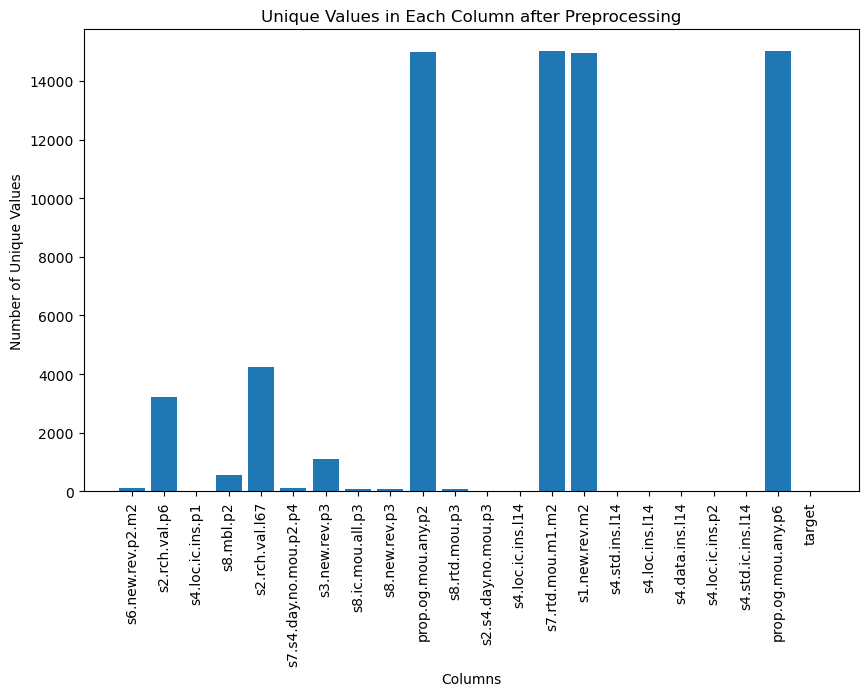

In [41]:
value_counts_cleaned = cleaned_df_capping_flooring_f.nunique()
plt.figure(figsize=(10,6))
plt.bar(value_counts_cleaned.index, value_counts_cleaned.values)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values in Each Column after Preprocessing')
plt.xticks(rotation=90)
plt.show()

In [42]:
cleaned_df_capping_flooring_f1 = cleaned_df_capping_flooring_f.drop(['prop.og.mou.any.p2', 's7.rtd.mou.m1.m2', 'prop.og.mou.any.p6'], axis=1)

In [43]:
cleaned_df_capping_flooring_f1

,s6.new.rev.p2.m2,s2.rch.val.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s4.loc.ic.ins.l14,s1.new.rev.m2,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,target
0,-0.68,39.29,2,-0.72,39.44,1.000000,7.16,-0.38,-0.58,-0.50,2.00,9,295.18890,0,12,0,5,0,1
1,-0.68,29.60,3,-0.08,30.00,0.500000,3.80,0.00,-0.14,-0.11,3.00,13,158.65470,0,13,0,6,0,1
2,-0.68,30.00,3,-0.09,30.00,0.384615,4.19,-0.38,-0.45,-0.39,2.00,13,120.02212,1,14,0,6,1,1
3,-0.68,50.00,4,1.83,46.67,0.416667,3.80,-0.38,-0.02,-0.02,2.25,14,120.02212,2,14,0,7,2,0
4,-0.68,29.60,4,-0.04,37.20,0.222222,5.12,-0.38,-0.58,-0.53,3.00,13,120.02212,1,14,2,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,29.60,4,0.76,39.17,0.250000,3.91,0.30,0.26,-0.13,2.50,12,120.02212,0,12,0,7,0,1
24996,0.42,29.60,4,0.37,30.00,0.454545,8.77,0.04,0.41,0.22,3.00,13,120.02212,0,13,0,7,0,0
24997,0.01,29.60,2,-0.79,30.00,0.083333,4.48,0.27,0.38,0.25,2.50,9,120.02212,1,12,1,5,0,0
24998,0.17,42.92,4,-1.09,40.02,99.000000,14.87,-0.38,-0.58,-0.53,0.00,14,481.44296,1,14,3,7,1,0


In [44]:
numerical_columns = cleaned_df_capping_flooring_f1.select_dtypes(include=['float64', 'int64'])

vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_columns.columns

vif_data["VIF"] = [variance_inflation_factor(numerical_columns.values, i) for i in range(len(numerical_columns.columns))]
print(vif_data)

                  Variable         VIF
0         s6.new.rev.p2.m2    2.911287
1            s2.rch.val.p6   52.707555
2         s4.loc.ic.ins.p1   89.948180
3                s8.mbl.p2    1.141566
4           s2.rch.val.l67   53.853891
5   s7.s4.day.no.mou.p2.p4    2.232709
6            s3.new.rev.p3   12.329861
7         s8.ic.mou.all.p3    1.153260
8            s8.new.rev.p3    2.847926
9            s8.rtd.mou.p3    2.276607
10     s2.s4.day.no.mou.p3    2.551259
11       s4.loc.ic.ins.l14  236.006964
12           s1.new.rev.m2   13.413782
13          s4.std.ins.l14   10.223286
14          s4.loc.ins.l14  150.413775
15         s4.data.ins.l14    1.504595
16        s4.loc.ic.ins.p2  374.733969
17       s4.std.ic.ins.l14    9.441841
18                  target    2.089899


In [45]:
vif_data.describe()

,VIF
count,19.000000
mean,53.778011
std,99.481118
min,1.141566
25%,2.254658
50%,9.441841
75%,53.280723
max,374.733969


# Model training

In [46]:
X = cleaned_df_capping_flooring_f1.drop(columns=['target'], axis=1)  
y = cleaned_df_capping_flooring_f1['target']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('training_data.csv', index=False)

In [49]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('testing_data.csv', index=False)

In [50]:
train_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('testing_data.csv')

In [51]:
print("Training Data:")
train_data.head()

Training Data:


,s6.new.rev.p2.m2,s2.rch.val.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s4.loc.ic.ins.l14,s1.new.rev.m2,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,target
0,0.42,103.33,4,0.00,101.67,0.333333,14.87,-0.07,0.41,0.35,2.0,13,308.68620,1,13,4,7,0,0
1,0.42,103.33,4,2.05,70.00,0.000000,9.43,0.30,0.41,0.35,0.0,13,224.02260,0,14,0,7,0,0
2,0.07,29.60,4,0.43,30.00,0.000000,5.38,0.30,0.17,0.10,2.0,13,127.94350,2,13,4,7,2,0
3,-0.68,29.60,3,-1.48,30.00,0.315789,3.94,-0.38,-0.29,0.00,3.0,13,120.02212,0,14,4,6,0,0
4,0.42,103.33,2,-3.58,101.67,0.000000,12.37,0.19,0.41,0.35,3.0,9,231.84420,5,12,4,5,3,0


In [52]:
train_data['target'].value_counts()

target
0    13646
1     6354
Name: count, dtype: int64

In [53]:
print("Testing Data:")
test_data.head()

Testing Data:


,s6.new.rev.p2.m2,s2.rch.val.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,s8.ic.mou.all.p3,s8.new.rev.p3,s8.rtd.mou.p3,s2.s4.day.no.mou.p3,s4.loc.ic.ins.l14,s1.new.rev.m2,s4.std.ins.l14,s4.loc.ins.l14,s4.data.ins.l14,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,target
0,0.42,29.60,4,0.06,30.89,0.000000,14.87,0.30,0.41,0.35,0.0,14,241.53540,5,14,0,7,3,0
1,-0.12,103.33,2,-3.58,101.67,0.187500,14.87,0.03,0.38,0.35,3.0,9,481.44296,5,12,0,5,3,0
2,-0.26,100.00,4,2.05,100.00,99.000000,12.67,0.16,-0.58,-0.53,0.0,14,481.44296,0,14,0,7,0,0
3,0.15,30.00,4,-3.58,65.00,0.166667,4.53,-0.04,-0.43,-0.32,0.0,14,120.02212,1,14,0,7,0,0
4,0.23,76.60,4,1.43,52.54,99.000000,7.85,-0.25,-0.26,-0.19,0.0,14,202.44160,5,14,0,7,3,0


In [54]:
test_data['target'].value_counts()

target
0    3437
1    1563
Name: count, dtype: int64

# Random Forest

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_rf)
test_acc_rf = accuracy_score(y_test, y_test_rf)
                             
print("Training Accuracy:", train_acc_rf)
print("Testing Accuracy:", test_acc_rf)                        

Training Accuracy: 0.99965
Testing Accuracy: 0.7894


In [57]:
accuracy_rf = accuracy_score(y_test, y_test_rf)
print("Accuracy of Logistic Regression:", (accuracy_rf * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_rf))

Accuracy of Logistic Regression: 78.94
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3437
           1       0.71      0.56      0.62      1563

    accuracy                           0.79      5000
   macro avg       0.76      0.73      0.74      5000
weighted avg       0.78      0.79      0.78      5000

Confusion Matrix:
[[3071  366]
 [ 687  876]]


# Hypertuning

In [58]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [59]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy:  0.7911499999999999


In [60]:
best_model = grid_search.best_estimator_
best_params = best_model.get_params()
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [61]:
train_pred = best_rf_model.predict(X_train)
test_pred = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8507
Testing Accuracy: 0.7948


In [62]:
accuracy_best_rf = accuracy_score(y_test,test_pred)
print("Accuracy of Logistic Regression:", (accuracy_best_rf * 100))

print("Classification Report:")
print(classification_report(y_test, test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

Accuracy of Logistic Regression: 79.47999999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3437
           1       0.72      0.57      0.63      1563

    accuracy                           0.79      5000
   macro avg       0.77      0.73      0.75      5000
weighted avg       0.79      0.79      0.79      5000

Confusion Matrix:
[[3086  351]
 [ 675  888]]


# Logistic Regression

In [63]:
lg_model = LogisticRegression(max_iter=100)
lg_model.fit(X_train, y_train)

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_train_lg = lg_model.predict(X_train)
y_test_lg = lg_model.predict(X_test)

train_acc_lg = accuracy_score(y_train, y_train_lg)
test_acc_lg = accuracy_score(y_test, y_test_lg)

print("Training Accuracy:", train_acc_lg)
print("Testing Accuracy:", test_acc_lg)

Training Accuracy: 0.7772
Testing Accuracy: 0.782


In [65]:
accuracy_lg = accuracy_score(y_test, y_test_lg)
print("Accuracy of Logistic Regression:", (accuracy_lg * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_lg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_lg))

Accuracy of Logistic Regression: 78.2
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3437
           1       0.69      0.55      0.61      1563

    accuracy                           0.78      5000
   macro avg       0.75      0.72      0.73      5000
weighted avg       0.77      0.78      0.77      5000

Confusion Matrix:
[[3056  381]
 [ 709  854]]


# Decision Tree

In [66]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
y_train_dt = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_dt)
test_acc_dt = accuracy_score(y_test, y_test_dt)

print("Training Accuracy:", train_acc_dt)
print("Testing Accuracy:", test_acc_dt)

Training Accuracy: 0.78695
Testing Accuracy: 0.7876


In [68]:
accuracy_dt = accuracy_score(y_test, y_test_dt)
print("Accuracy of Decision Tree:", (accuracy_dt * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_dt))

Accuracy of Decision Tree: 78.75999999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3437
           1       0.69      0.59      0.63      1563

    accuracy                           0.79      5000
   macro avg       0.76      0.73      0.74      5000
weighted avg       0.78      0.79      0.78      5000

Confusion Matrix:
[[3020  417]
 [ 645  918]]


# Comparison among models

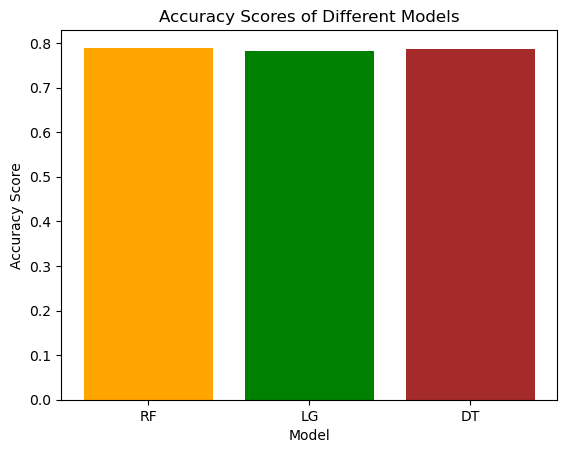

In [78]:
Model = ['RF', 'LG', 'DT']
Score = [accuracy_rf, accuracy_lg, accuracy_dt]

colr = ['orange', 'green', 'brown']
barplot = plt.bar(x=Model, height=Score, color=colr)

plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.show()

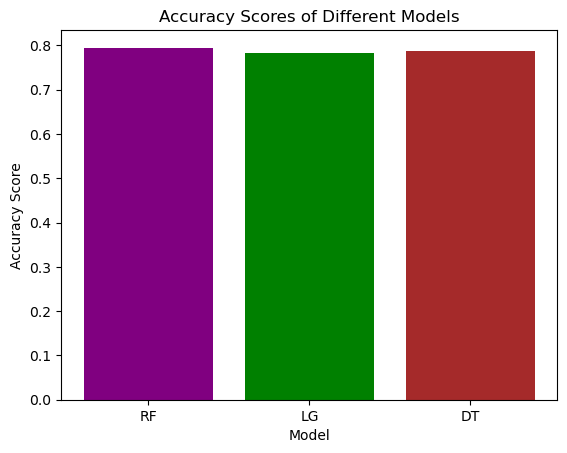

In [79]:
#After hypertuning 

Model = ['RF', 'LG', 'DT']
Score = [accuracy_best_rf, accuracy_lg, accuracy_dt]

colr = ['purple', 'green', 'brown']
barplot = plt.bar(x=Model, height=Score, color=colr)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.show()

# After comparing the models, I found that both the Decision Tree and Logistic Regression are the best models because they performed the best on both the training and testing data.